In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 

*TASK 1) Merge the 12 Month of Sales Data into a single CSV file.*

In [2]:
# Folder containing all CSV files
folder_path = r"C:\Users\AYAN SHAIKH\OneDrive\Documents\Keith Pandas\SalesAnalysis\Sales_Data"

# Get list of files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
all_month_data = pd.DataFrame()

# Loop through each file and concatenate
for file in files:
    file_path = os.path.join(folder_path, file)  # Correctly join paths
    df = pd.read_csv(file_path)
    all_month_data = pd.concat([all_month_data, df], ignore_index= True)

# Display first 10 rows
all_month_data.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
186841,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
186843,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [3]:
all_data = all_month_data

*CLEAN UP DATA!!*

*Drop rows of NAN *

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


*find 'OR' and delete it.*

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

*Convert Columns to the correct type*

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make Float

*TASK 2) ADD MONTH COLUMN*

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


*TASK 3) ADD A SALES COLUMN*

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


*TASK 4) ADD A CITY COLUMN*

*Use .apply() method*

In [9]:
all_data['City_State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ', ' + x.split(',')[2].strip().split()[0])


*Question 1) What was the best month of sales? how much was earned month?*

In [10]:
result = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()


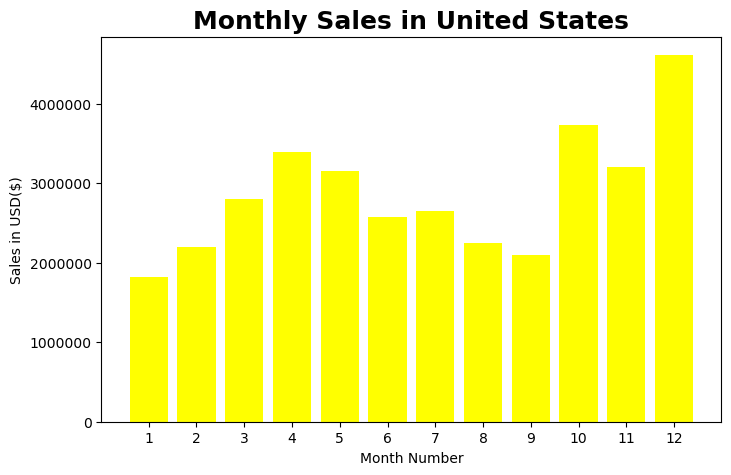

In [11]:
plt.figure(figsize=(8,5))
months = range(1,13)
plt.title('Monthly Sales in United States', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.bar(months,result['Sales'], color='yellow')
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')

plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on Y-axis

plt.show()


*Question 2) What city had the highest number of sales?*

In [12]:
City_sales = all_data.groupby('City_State')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
City_sales

,Quantity Ordered,Price Each,Sales
City_State,,,
"Atlanta, GA",16602,2779908.20,2795498.58
"Austin, TX",11153,1809873.61,1819581.75
"Boston, MA",22528,3637409.77,3661642.01
"Dallas, TX",16730,2752627.82,2767975.40
"Los Angeles, CA",33289,5421435.23,5452570.80
"New York City, NY",27932,4635370.83,4664317.43
"Portland, ME",2750,447189.25,449758.27
"Portland, OR",11303,1860558.22,1870732.34
"San Francisco, CA",50239,8211461.74,8262203.91


In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


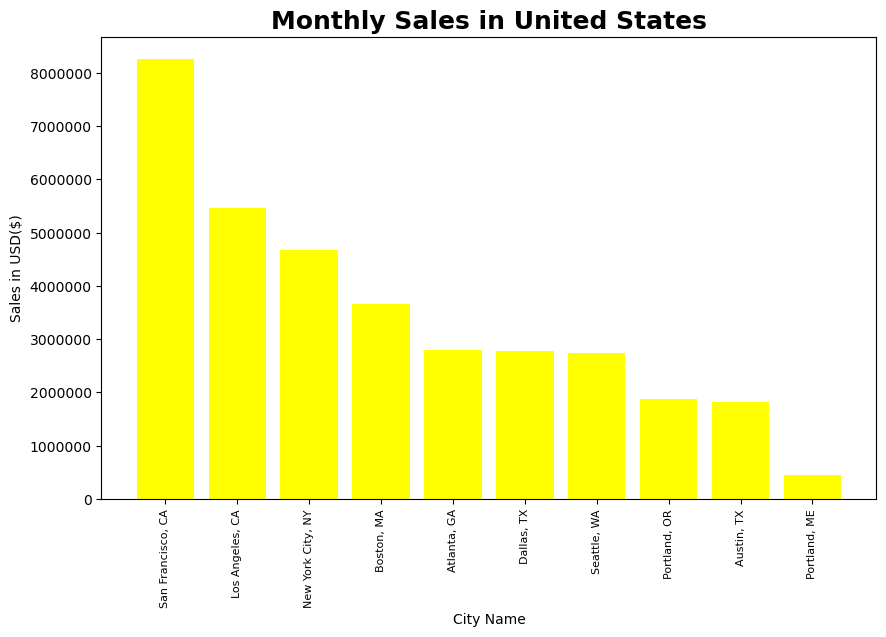

In [14]:
plt.figure(figsize=(10,6))

# Group by City and Sum the Sales
City_sales = all_data.groupby('City_State')['Sales'].sum()

# Ensure Correct Sorting (Descending Sales)
City_sales = City_sales.sort_values(ascending=False)

# Get City Names (X-axis) & Corresponding Sales (Y-axis)
cities = City_sales.index  # X-axis (City names)
sales = City_sales.values  # Y-axis (Sales values)

plt.title('Monthly Sales in United States', fontdict={'fontsize': 18, 'fontweight': 'bold'})

# Plot the Correct City-Sales Mapping
plt.bar(cities, sales, color='yellow')

# Rotate X-axis labels for better visibility
plt.xticks(rotation='vertical', fontsize=8)

plt.xlabel('City Name')
plt.ylabel('Sales in USD($)')

# Disable scientific notation on Y-axis
plt.ticklabel_format(style='plain', axis='y')  

plt.show()



*Question 3) What time should we display advertisments to maximize likehlihood of customer's buying product?*

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\AYAN SHAIKH\AppData\Local\Temp\ipykernel_20980\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


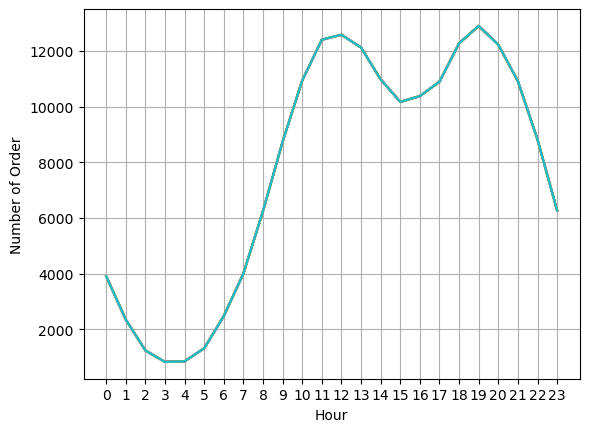

In [17]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
# all_data.groupby(['Hour']).count()

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Order')
plt.grid()
plt.show()

*Q4) What products are most often sold together?*

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\AYAN SHAIKH\AppData\Local\Temp\ipykernel_20980\3892263634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

*Q5) What product sold the most? why do you think it sold the most?*

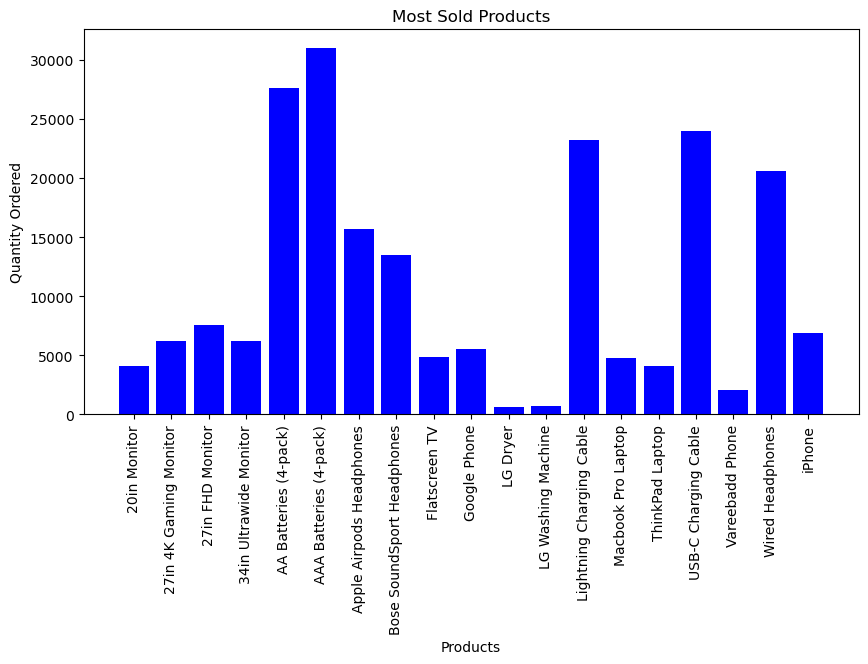

In [20]:
# Select only numeric columns
numeric_columns = all_data.select_dtypes(include=['number'])

# Group by 'Product' and sum the numeric columns
quantity_ordered = all_data.groupby('Product')[numeric_columns.columns].sum()

# Extract products and their total quantities
products = quantity_ordered.index  # List of product names
quantities = quantity_ordered['Quantity Ordered']  # Adjust this based on your column name

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(products, quantities, color='blue')

plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Most Sold Products")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()

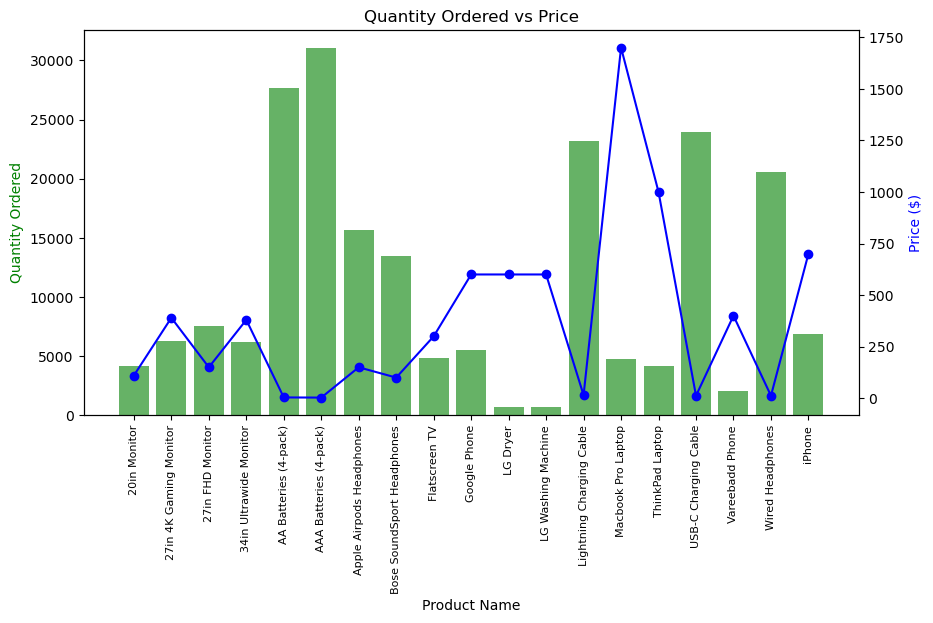

In [21]:
import matplotlib.pyplot as plt

# Ensure 'Price Each' is numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Get mean price for each product
prices = all_data.groupby('Product')['Price Each'].mean()

# Get quantity ordered for each product
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

# Get product names
products = quantity_ordered.index  # Since it's grouped by 'Product'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,5))  # Use plt.subplots(), not plt.subplot()
ax2 = ax1.twinx()

# Plot bar chart for quantity ordered
ax1.bar(products, quantity_ordered, color='green', alpha=0.6)

# Plot line chart for price
ax2.plot(products, prices, 'b-', marker='o')

# Labels
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set x-axis labels properly
ax1.set_xticks(range(len(products)))  
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.title('Quantity Ordered vs Price')
plt.show()
